# Ageing indicators

In [1]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
import numpy as np
import contextily as cx
import shapely.geometry as geom
from splot.libpysal import plot_spatial_weights

In [2]:
%run data.ipynb

### Ageing index
The number of persons aged 65+ per 100 persons under age 15

### Dependency ratio
The number of persons under 15 plus persons aged 65+ per 100 persons aged 15-64

### Elderly support ratio
The number of people aged 65+ per 100 persons aged 15-64

In [3]:
ageing_indicators_2010 = population.query('Year == 2010').pivot_table(index = ['Barri_code', 'Barri_name'], 
                                                                 columns=['Age_group'], 
                                                            values='Number', aggfunc='sum').reset_index()
ageing_indicators_2010['Total'] = ageing_indicators_2010['< 15 years'] + ageing_indicators_2010['15-64 years'] + ageing_indicators_2010['65 years and more']

ageing_indicators_2010['Ageing_index'] = ageing_indicators_2010['65 years and more'] / ageing_indicators_2010['< 15 years'] * 100
ageing_indicators_2010['Dependency_ratio'] = (ageing_indicators_2010['65 years and more'] + ageing_indicators_2010['< 15 years']) / ageing_indicators_2010['15-64 years'] * 100
ageing_indicators_2010['Elderly_support_ratio'] = ageing_indicators_2010['65 years and more'] / ageing_indicators_2010['15-64 years'] * 100

In [4]:
ageing_indicators_2019 = population.query('Year == 2019').pivot_table(index = ['Barri_code', 'Barri_name'], 
                                                                 columns=['Age_group'], 
                                                            values='Number', aggfunc='sum').reset_index()
ageing_indicators_2019['Total'] = ageing_indicators_2019['< 15 years'] + ageing_indicators_2019['15-64 years'] + ageing_indicators_2019['65 years and more']

ageing_indicators_2019['Ageing_index'] = ageing_indicators_2019['65 years and more'] / ageing_indicators_2019['< 15 years'] * 100
ageing_indicators_2019['Dependency_ratio'] = (ageing_indicators_2019['65 years and more'] + ageing_indicators_2019['< 15 years']) / ageing_indicators_2019['15-64 years'] * 100
ageing_indicators_2019['Elderly_support_ratio'] = ageing_indicators_2019['65 years and more'] / ageing_indicators_2019['15-64 years'] * 100

In [5]:
ageing_indicator_2010_2019 = ageing_indicators_2010[['Barri_code', 'Barri_name', 
                        'Ageing_index', 'Dependency_ratio', 
                        'Elderly_support_ratio']].merge(ageing_indicators_2019[['Barri_code', 'Barri_name', 
                                                                                'Ageing_index', 'Dependency_ratio', 
                                                                                'Elderly_support_ratio']], 
                                                        on=['Barri_code', 'Barri_name'],
                                                        suffixes=('_2010', '_2019'))[['Barri_code', 'Barri_name', 
                                                                                     'Ageing_index_2010', 'Ageing_index_2019',
                                                                                     'Dependency_ratio_2010', 'Dependency_ratio_2019',
                                                                                     'Elderly_support_ratio_2010', 'Elderly_support_ratio_2019']]

In [6]:
ageing_indicator_2010_2019['Ageing_index_change'] = ageing_indicator_2010_2019['Ageing_index_2019'] - ageing_indicator_2010_2019['Ageing_index_2010']
ageing_indicator_2010_2019['Dependency_ratio_change'] = ageing_indicator_2010_2019['Dependency_ratio_2019'] - ageing_indicator_2010_2019['Dependency_ratio_2010']
ageing_indicator_2010_2019['Elderly_support_ratio_change'] = ageing_indicator_2010_2019['Elderly_support_ratio_2019'] - ageing_indicator_2010_2019['Elderly_support_ratio_2010']
ageing_indicator_2010_2019[['Barri_code', 'Barri_name','Ageing_index_change', 'Dependency_ratio_change', 'Elderly_support_ratio_change']]

Age_group,Barri_code,Barri_name,Ageing_index_change,Dependency_ratio_change,Elderly_support_ratio_change
0,1,el Raval,-30.964357,-2.173597,-3.523466
1,2,el Barri Gòtic,-31.555070,-5.719837,-4.754083
2,3,la Barceloneta,15.439343,-9.729916,-6.091476
3,4,"Sant Pere, Santa Caterina i la Ribera",-21.505285,-6.129179,-4.839101
4,5,el Fort Pienc,7.891677,4.187437,3.162565
...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,1.087608,3.544203,1.741521
69,70,el Besòs i el Maresme,-41.117089,1.822641,-2.379893
70,71,Provençals del Poblenou,-3.073584,4.740892,2.391300
71,72,Sant Martí de Provençals,-2.474935,1.134726,0.629536


In [7]:
# def highlight_values(val):
#     if val==0:
#         return 'background-color: %s' % '#ffffff'
#     elif val<0:
#         return 'background-color: %s' % '#43D255'
#     elif val>0:
#         return 'background-color: %s' % '#FF5B52'
#     else:
#         return ''

In [8]:
# t = ageing_indicator_2010_2019[['Ageing_index_change', 'Dependency_ratio_change', 'Elderly_support_ratio_change']]
# t.style.applymap(highlight_values)

In [39]:
ageing_indicators_barris = population.pivot_table(index = ['Year', 'Barri_code', 'Barri_name'], columns=['Age_group'], 
                                                values='Number', aggfunc='sum').reset_index()
ageing_indicators_barris['Total'] = ageing_indicators_barris['< 15 years'] + ageing_indicators_barris['15-64 years'] + ageing_indicators_barris['65 years and more']

ageing_indicators_barris['Ageing_index'] = round(ageing_indicators_barris['65 years and more'] / ageing_indicators_barris['< 15 years'] * 100,1)
ageing_indicators_barris['Dependency_ratio'] = round((ageing_indicators_barris['65 years and more'] + ageing_indicators_barris['< 15 years']) / ageing_indicators_barris['15-64 years'] * 100,1)
ageing_indicators_barris['Elderly_support_ratio'] = round(ageing_indicators_barris['65 years and more'] / ageing_indicators_barris['15-64 years'] * 100,1)

In [40]:
ageing_indicators_barris = ageing_indicators_barris[['Year', 'Barri_code', 'Barri_name', 'Ageing_index', 'Dependency_ratio', 'Elderly_support_ratio']]
ageing_indicators_barris = ageing_indicators_barris.merge(barris, on='Barri_code')
ageing_indicators_barris = gpd.GeoDataFrame(ageing_indicators_barris, geometry=ageing_indicators_barris['geometry'])

In [41]:
ageing_indicators_barris

,Year,Barri_code,Barri_name,Ageing_index,Dependency_ratio,Elderly_support_ratio,geometry
0,2010,1,el Raval,121.6,34.0,18.6,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,2011,1,el Raval,112.4,34.3,18.1,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
2,2012,1,el Raval,107.0,33.3,17.2,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
3,2013,1,el Raval,103.7,33.2,16.9,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
4,2014,1,el Raval,100.4,33.8,16.9,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
...,...,...,...,...,...,...,...
725,2015,73,la Verneda i la Pau,217.7,62.8,43.1,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."
726,2016,73,la Verneda i la Pau,218.6,63.3,43.4,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."
727,2017,73,la Verneda i la Pau,220.4,62.8,43.2,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."
728,2018,73,la Verneda i la Pau,218.4,63.0,43.2,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


C:\Users\THINK\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, '2019')

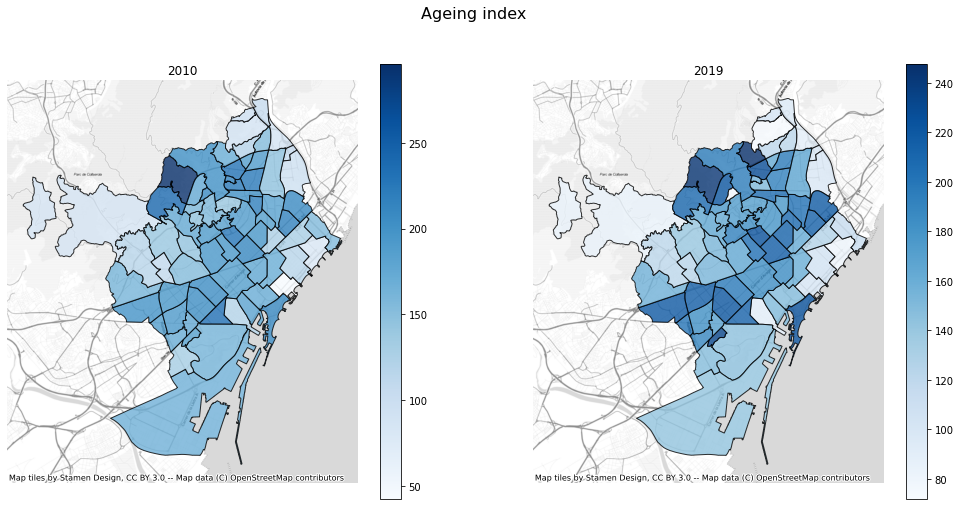

In [42]:
f, ax = plt.subplots(1,2,figsize=(2.16*8,8))

df = ageing_indicators_barris
df = gpd.GeoDataFrame(df, geometry=df['geometry'], crs={"init": "epsg:4326"})
df = df.to_crs(epsg=3857)

df.query('Year == 2010').plot('Ageing_index', ax=ax[0], alpha=0.8, cmap='Blues', edgecolor='k', legend=True)
cx.add_basemap(ax[0], crs=df.crs, source=cx.providers.Stamen.TonerLite)
ax[0].axis('off')

df.query('Year == 2019').plot('Ageing_index', ax=ax[1], alpha=0.8, cmap='Blues', edgecolor='k', legend=True)
cx.add_basemap(ax[1], crs=df.crs, source=cx.providers.Stamen.TonerLite)
ax[1].axis('off')

f.suptitle('Ageing index', fontsize=16)
ax[0].set_title("2010")
ax[1].set_title("2019")

In [11]:
ageing_indicators = population.pivot_table(index = ['Year'], columns=['Age_group'], 
                                                values='Number', aggfunc='sum').reset_index()
ageing_indicators['Total'] = ageing_indicators['< 15 years'] + ageing_indicators['15-64 years'] + ageing_indicators['65 years and more']

ageing_indicators['Ageing_index'] = round(ageing_indicators['65 years and more'] / ageing_indicators['< 15 years'] * 100,1)
ageing_indicators['Dependency_ratio'] = round((ageing_indicators['65 years and more'] + ageing_indicators['< 15 years']) / ageing_indicators['15-64 years'] * 100,1)
ageing_indicators['Elderly_support_ratio'] = round(ageing_indicators['65 years and more'] / ageing_indicators['15-64 years'] * 100,1)

In [12]:
ageing_indicators[['Year', 'Ageing_index', 'Dependency_ratio', 'Elderly_support_ratio']].query('Year == 2010 or Year == 2019')

Age_group,Year,Ageing_index,Dependency_ratio,Elderly_support_ratio
0,2010,170.6,48.4,30.5
9,2019,171.0,51.3,32.4


In [13]:
ageing_indicators_spain_eu = population_spain.query('GEO == "Spain"').pivot_table(index = ['TIME', 'GEO'], columns=['AGE'], 
                                                values='Value', aggfunc='sum').reset_index()
ageing_indicators_spain_eu['Ageing_index'] = round(ageing_indicators_spain_eu['65 years or over'] / ageing_indicators_spain_eu['Less than 15 years'] * 100,1)
ageing_indicators_spain_eu['Dependency_ratio'] = round((ageing_indicators_spain_eu['65 years or over'] + ageing_indicators_spain_eu['Less than 15 years']) / ageing_indicators_spain_eu['From 15 to 64 years'] * 100,1)
ageing_indicators_spain_eu['Elderly_support_ratio'] = round(ageing_indicators_spain_eu['65 years or over'] / ageing_indicators_spain_eu['From 15 to 64 years'] * 100,1)
ageing_indicators_spain_eu[['TIME', 'GEO', 'Ageing_index', 'Dependency_ratio', 'Elderly_support_ratio']].query('TIME == 2019 or TIME == 2010')

AGE,TIME,GEO,Ageing_index,Dependency_ratio,Elderly_support_ratio
0,2010,Spain,112.6,46.4,24.6
9,2019,Spain,131.4,51.9,29.5


In [14]:
ageing_indicators_cat = population_cat.pivot_table(index = ['TIME', 'GEO'], columns=['AGE'], 
                                                values='Value', aggfunc='sum').reset_index()
ageing_indicators_cat['Total'] = ageing_indicators_cat['< 15 years'] + ageing_indicators_cat['15-64 years'] + ageing_indicators_cat['65 years and more']

ageing_indicators_cat['Ageing_index'] = round(ageing_indicators_cat['65 years and more'] / ageing_indicators_cat['< 15 years'] * 100,1)
ageing_indicators_cat['Dependency_ratio'] = round((ageing_indicators_cat['65 years and more'] + ageing_indicators_cat['< 15 years']) / ageing_indicators_cat['15-64 years'] * 100,1)
ageing_indicators_cat['Elderly_support_ratio'] = round(ageing_indicators_cat['65 years and more'] / ageing_indicators_cat['15-64 years'] * 100,1)
ageing_indicators_cat[['TIME', 'GEO', 'Ageing_index', 'Dependency_ratio', 'Elderly_support_ratio']].query('TIME == 2019 or TIME == 2010')

AGE,TIME,GEO,Ageing_index,Dependency_ratio,Elderly_support_ratio
0,2010,Catalonia,107.4,46.8,24.2
9,2019,Catalonia,121.6,52.5,28.8


# Population ageing matrix
A theorethical framework that classifies the demographic dynamics of population ageing across metropolitan areas.

Numeric ageing - percentage change in the number of people ages 65+ per unit area between 2010 and 2019.

Structural ageing - percentage change in the ratio of of the 65+ population to the total population per barri between 2010 and 2019.

In [15]:
area_df = pop_density.copy()
area_df = area_df[['Year', 'Barri_code', 'Area_ha']]

numeric2010 = population_tg.query('Year == 2010').merge(area_df.query('Year == 2010'), on = "Barri_code")
numeric2010 = numeric2010[['Year_x', 'District_code', 'District_name', 'Barri_code', 'Barri_name',
       'Age_group', 'Number', 'geometry_district', 'geometry_barri',
       'geometry', 'Area_ha']].rename(columns = {'Year_x': 'Year'})
numeric2010['Density'] = numeric2010['Number'].div(numeric2010['Area_ha'], axis=0).round(2)
numeric2010 = numeric2010[['Year', 'District_code', 'District_name', 'Barri_code', 'Barri_name',
       'Age_group', 'Number', 'Area_ha', 'Density', 'geometry_district', 'geometry_barri',
       'geometry']]
numeric2010 = numeric2010.query('Age_group == "65 years and more"')
numeric2010.head()

,Year,District_code,District_name,Barri_code,Barri_name,Age_group,Number,Area_ha,Density,geometry_district,geometry_barri,geometry
1,2010,1,Ciutat Vella,1,el Raval,65 years and more,6576,109.8,59.89,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
4,2010,1,Ciutat Vella,2,el Barri Gòtic,65 years and more,2730,84.2,32.42,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
7,2010,1,Ciutat Vella,3,la Barceloneta,65 years and more,3307,131.4,25.17,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
10,2010,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",65 years and more,3833,111.4,34.41,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
13,2010,2,Eixample,5,el Fort Pienc,65 years and more,6417,92.9,69.07,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."


In [16]:
numeric2019 = population_tg.query('Year == 2019').merge(area_df.query('Year == 2010'), on = "Barri_code")
numeric2019 = numeric2019[['Year_x', 'District_code', 'District_name', 'Barri_code', 'Barri_name',
       'Age_group', 'Number', 'geometry_district', 'geometry_barri',
       'geometry', 'Area_ha']].rename(columns = {'Year_x': 'Year'})
numeric2019['Density'] = numeric2019['Number'].div(numeric2019['Area_ha'], axis=0).round(2)
numeric2019 = numeric2019[['Year', 'District_code', 'District_name', 'Barri_code', 'Barri_name',
       'Age_group', 'Number', 'Area_ha', 'Density', 'geometry_district', 'geometry_barri',
       'geometry']]
numeric2019 = numeric2019.query('Age_group == "65 years and more"')
numeric2019.head()

,Year,District_code,District_name,Barri_code,Barri_name,Age_group,Number,Area_ha,Density,geometry_district,geometry_barri,geometry
1,2019,1,Ciutat Vella,1,el Raval,65 years and more,5433,109.8,49.48,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
4,2019,1,Ciutat Vella,2,el Barri Gòtic,65 years and more,2156,84.2,25.61,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
7,2019,1,Ciutat Vella,3,la Barceloneta,65 years and more,2597,131.4,19.76,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
10,2019,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",65 years and more,3169,111.4,28.45,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
13,2019,2,Eixample,5,el Fort Pienc,65 years and more,6871,92.9,73.96,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."


In [17]:
numeric = numeric2010[['Barri_code', 'Barri_name', 'Density']].merge(numeric2019[['Barri_code', 'Density']], on='Barri_code')

In [18]:
numeric.rename(columns={'Density_x': 'Density_2010', 'Density_y': 'Density_2019'}, inplace=True)

In [19]:
numeric['Change'] = (numeric['Density_2019'] - numeric['Density_2010'])/numeric['Density_2010']*100

In [20]:
numeric

,Barri_code,Barri_name,Density_2010,Density_2019,Change
0,1,el Raval,59.89,49.48,-17.381867
1,2,el Barri Gòtic,32.42,25.61,-21.005552
2,3,la Barceloneta,25.17,19.76,-21.493842
3,4,"Sant Pere, Santa Caterina i la Ribera",34.41,28.45,-17.320546
4,5,el Fort Pienc,69.07,73.96,7.079774
...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,13.06,16.54,26.646248
69,70,el Besòs i el Maresme,35.28,33.06,-6.292517
70,71,Provençals del Poblenou,30.19,34.42,14.011262
71,72,Sant Martí de Provençals,88.70,89.10,0.450958


In [21]:
structural2010 = population_tg.query('Year == 2010').groupby(['Year', 'District_code', 'District_name', 
                       'Barri_code', 'Barri_name', 'Age_group']).agg({'Number': 'sum'}).groupby(level=["Year","Barri_name"]).apply(lambda x: 100 * x / float(x.sum())).reset_index()
structural2010 = structural2010.merge(districts, on='District_code').merge(barris, on='Barri_code')
structural2010.rename(columns={'geometry_x': 'geometry_district', 'geometry_y': 'geometry_barri'}, inplace=True)
structural2010 = gpd.GeoDataFrame(structural2010, geometry=structural2010['geometry_barri'])
structural2010 = structural2010.query('Age_group == "65 years and more"')
structural2010.head()

,Year,District_code,District_name,Barri_code,Barri_name,Age_group,Number,geometry_district,geometry_barri,geometry
1,2010,1,Ciutat Vella,1,el Raval,65 years and more,13.917166,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
4,2010,1,Ciutat Vella,2,el Barri Gòtic,65 years and more,14.732866,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
7,2010,1,Ciutat Vella,3,la Barceloneta,65 years and more,20.541649,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
10,2010,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",65 years and more,16.939939,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
13,2010,2,Eixample,5,el Fort Pienc,65 years and more,19.665952,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."


In [22]:
structural2019 = population_tg.query('Year == 2019').groupby(['Year', 'District_code', 'District_name', 
                       'Barri_code', 'Barri_name', 'Age_group']).agg({'Number': 'sum'}).groupby(level=["Year","Barri_name"]).apply(lambda x: 100 * x / float(x.sum())).reset_index()
structural2019 = structural2019.merge(districts, on='District_code').merge(barris, on='Barri_code')
structural2019.rename(columns={'geometry_x': 'geometry_district', 'geometry_y': 'geometry_barri'}, inplace=True)
structural2019 = gpd.GeoDataFrame(structural2019, geometry=structural2019['geometry_barri'])
structural2019 = structural2019.query('Age_group == "65 years and more"')
structural2019.head()

,Year,District_code,District_name,Barri_code,Barri_name,Age_group,Number,geometry_district,geometry_barri,geometry
1,2019,1,Ciutat Vella,1,el Raval,65 years and more,11.473402,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...","POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
4,2019,1,Ciutat Vella,2,el Barri Gòtic,65 years and more,11.573353,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...","POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
7,2019,1,Ciutat Vella,3,la Barceloneta,65 years and more,17.479976,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...","POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
10,2019,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",65 years and more,14.028331,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...","POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
13,2019,2,Eixample,5,el Fort Pienc,65 years and more,21.240224,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...","POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."


In [23]:
structural = structural2010[['Barri_code', 'Barri_name', 'Number']].merge(structural2019[['Barri_code', 'Number']], on='Barri_code')

In [24]:
structural.rename(columns={'Number_x': 'Number_2010', 'Number_y': 'Number_2019'}, inplace=True)

In [25]:
structural['Change'] = structural['Number_2019'] - structural['Number_2010']

In [26]:
ageing_matrix = numeric[['Barri_code', 'Barri_name', 'Change']].merge(structural[['Barri_code', 'Change']], on='Barri_code')

In [27]:
ageing_matrix.rename(columns={'Change_x': 'Change_numeric', 'Change_y': 'Change_structural'}, inplace=True)

In [28]:
ageing_matrix.sort_values(by='Change_numeric', ascending=False)

,Barri_code,Barri_name,Change_numeric,Change_structural
66,67,la Vila Olímpica del Poblenou,79.100851,6.610910
48,49,Canyelles,31.195652,7.864851
68,69,Diagonal Mar i el Front Marítim del Poblenou,26.646248,0.814174
40,41,la Vall d'Hebron,25.473934,4.772054
65,66,el Parc i la Llacuna del Poblenou,24.349776,1.535584
...,...,...,...,...
1,2,el Barri Gòtic,-21.005552,-3.159512
2,3,la Barceloneta,-21.493842,-3.061673
45,46,el Turó de la Peira,-23.015283,-4.685465
39,40,Montbau,-24.288840,-7.843018


**Dilution** - 
This quadrant represents areas which are experiencing structural decrease and numeric
increase. In this case, the over 65 population as a percentage of the total population in
that area is decreasing or becoming ‘diluted’ relative to younger age groups. Although
the numbers of the older demographic are increasing, they are not keeping pace with
the increases in the under 65 age group. This may be due to out-migration on the part
of the older demographic, or in-migration on the part of the younger one. The
numbers of the over 65 population continue to increase, pointing to ageing-in-place
as well as in-migration of the older demographic (but not as much as for younger
people).


**Accumulation** - 
This quadrant represents areas that are experiencing both structural and numeric increase
in the over 65 population group. In this case the over 65 population is accumulating in the
area, possibly due to the older demographic ageing-in-place, as well as attracting people
from this demographic into the area (in-migration). Structural increase may also be a
result of the under 65 demographic moving out of the area.


**Concentration** - 
This quadrant represents areas which are experiencing structural increase but numeric
decrease. Here the over 65 population as a percentage of the total population is increasing
while the total numbers of the over 65 population are decreasing. In effect there is a concentration
of the older demographic even though the overall numbers are falling. This
points to a trend of out-migration, especially of the younger demographic.


**Decline** - 
This quadrant represents areas that are experiencing structural and numeric decreases in
the over 65 population. This is most likely as a result of over 65 out-migration or stagnation
coupled with a growth in the under 65 population group both in structural and
numeric terms.

In [29]:
def label_ageing(row):
    if row['Change_numeric'] > ageing_matrix['Change_numeric'].mean() and row['Change_structural'] > ageing_matrix['Change_structural'].mean():
        return 'Accumulation'
    if row['Change_numeric'] > ageing_matrix['Change_numeric'].mean() and row['Change_structural'] < ageing_matrix['Change_structural'].mean():
        return 'Concentration'
    if row['Change_numeric'] < ageing_matrix['Change_numeric'].mean() and row['Change_structural'] < ageing_matrix['Change_structural'].mean():
        return 'Decline'
    if row['Change_numeric'] < ageing_matrix['Change_numeric'].mean() and row['Change_structural'] > ageing_matrix['Change_structural'].mean():
        return 'Dilution'

In [30]:
ageing_matrix['Label'] = ageing_matrix.apply(lambda row: label_ageing(row), axis=1)

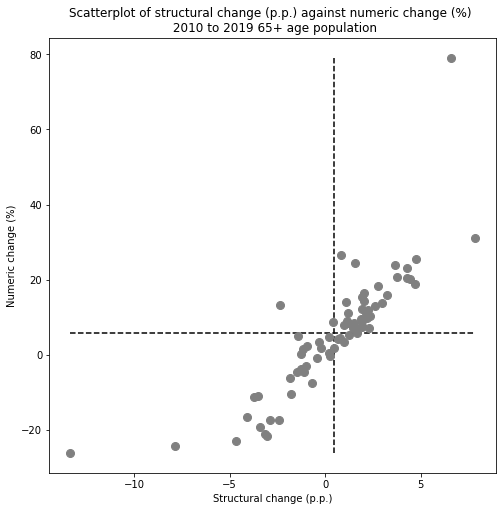

In [31]:
f, ax = plt.subplots(1, figsize=(8,8))

plt.plot(ageing_matrix['Change_structural'], ageing_matrix['Change_numeric'], 'o', markersize=8, color='grey')

 # dashed horizontal at mean of the price
plt.hlines(ageing_matrix['Change_numeric'].mean(), ageing_matrix['Change_structural'].min(), ageing_matrix['Change_structural'].max(), linestyle='--')
 # dashed vertical at mean of lagged price 
plt.vlines(ageing_matrix['Change_structural'].mean(), ageing_matrix['Change_numeric'].min(), ageing_matrix['Change_numeric'].max(), linestyle='--')

plt.title('Scatterplot of structural change (p.p.) against numeric change (%) \n 2010 to 2019 65+ age population')
plt.xlabel('Structural change (p.p.)')
plt.ylabel('Numeric change (%)')
plt.show()


In [32]:
ageing_matrix = gpd.GeoDataFrame(ageing_matrix.merge(barris, on='Barri_code'), geometry='geometry')

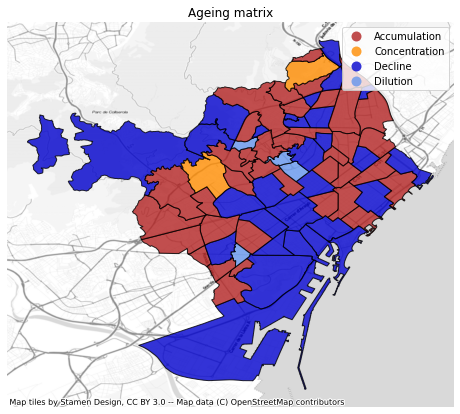

In [33]:
from matplotlib import colors
f, ax = plt.subplots(1, figsize=(8,8))
hmap = colors.ListedColormap(['firebrick', 'darkorange', 'mediumblue', 'cornflowerblue'])

ageing_matrix.plot(column='Label', cmap=hmap, categorical=True, alpha=0.8, ax=ax, edgecolor='k', legend=True)
cx.add_basemap(ax, crs=ageing_matrix.crs, source=cx.providers.Stamen.TonerLite)

ax.set_axis_off()
plt.title("Ageing matrix")

plt.show()